<a href="https://colab.research.google.com/github/poojita3496/Analytics-based-on-Govt.-Land-Information-System-GLIS--Data/blob/main/Analytics_based_on_Govt_Land_Information_System_(GLIS)_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
upload=files.upload()

Saving Land_India.csv to Land_India.csv


In [11]:
import pandas as pd
df=pd.read_csv("Land_India.csv")
print(df.to_string())

                   States/UTs Category  Total geographical area  Reporting area for land utilization  Forests  Not available for cultivation  Permanent pastures and other grazing lands  Land under miscellaneous tree crops & groves  Culturable wasteland  Fallow lands other than current fallows  Current fallows  Net area sown
0              Andhra Pradesh     Area                    27507                                27505   6210.0                           4781                                       602.0                                         320.0                 695.0                                   1583.0           3166.0          10147
1           Arunachal Pradesh     Area                     8374                                 5659   5154.0                             65                                        18.0                                          37.0                  67.0                                     73.0             37.0            209
2                     

In [ ]:
pip install pandas geopandas matplotlib folium


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Land_India.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


          States/UTs Category  Total geographical area  \
0     Andhra Pradesh     Area                    27507   
1  Arunachal Pradesh     Area                     8374   
2              Assam     Area                     7844   
3              Bihar     Area                     9416   
4       Chhattisgarh     Area                    13519   

   Reporting area for land utilization  Forests  \
0                                27505   6210.0   
1                                 5659   5154.0   
2                                 7850   1954.0   
3                                 9360    622.0   
4                                13790   6355.0   

   Not available for cultivation  Permanent pastures and other grazing lands  \
0                           4781                                       602.0   
1                             65                                        18.0   
2                           2512                                       160.0   
3                       

In [ ]:
# Check data types and convert if necessary
print(data.dtypes)

# Handle missing values (e.g., fill with zero or drop)
data.fillna(0, inplace=True)

# Convert relevant columns to numeric
for column in data.columns[2:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Verify the changes
print(data.dtypes)
print(data.describe())


States/UTs                                       object
Category                                         object
Total geographical area                           int64
Reporting area for land utilization               int64
Forests                                         float64
Not available for cultivation                     int64
Permanent pastures and other grazing lands      float64
Land under miscellaneous tree crops & groves    float64
Culturable wasteland                            float64
Fallow lands other than current fallows         float64
Current fallows                                 float64
Net area sown                                     int64
dtype: object
States/UTs                                       object
Category                                         object
Total geographical area                           int64
Reporting area for land utilization               int64
Forests                                         float64
Not available for cultivation     

<Figure size 1500x1000 with 0 Axes>

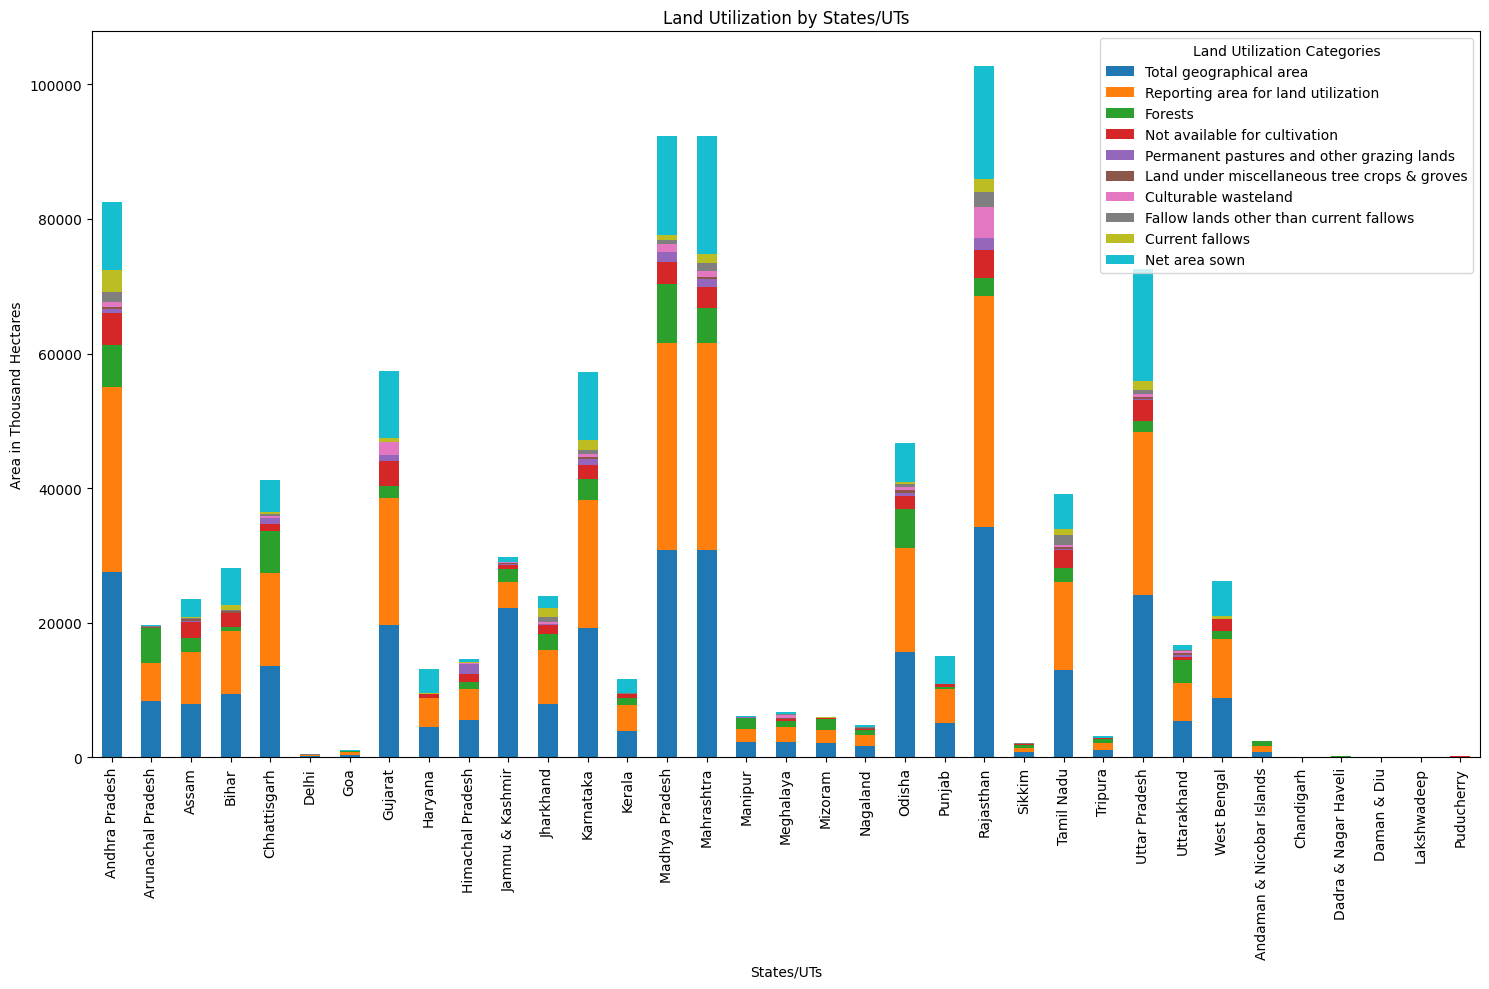

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plotting the land utilization categories
utilization_columns = data.columns[2:]
data.set_index('States/UTs')[utilization_columns].plot(kind='bar', stacked=True, figsize=(15, 10))

plt.title('Land Utilization by States/UTs')
plt.xlabel('States/UTs')
plt.ylabel('Area in Thousand Hectares')
plt.legend(title='Land Utilization Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


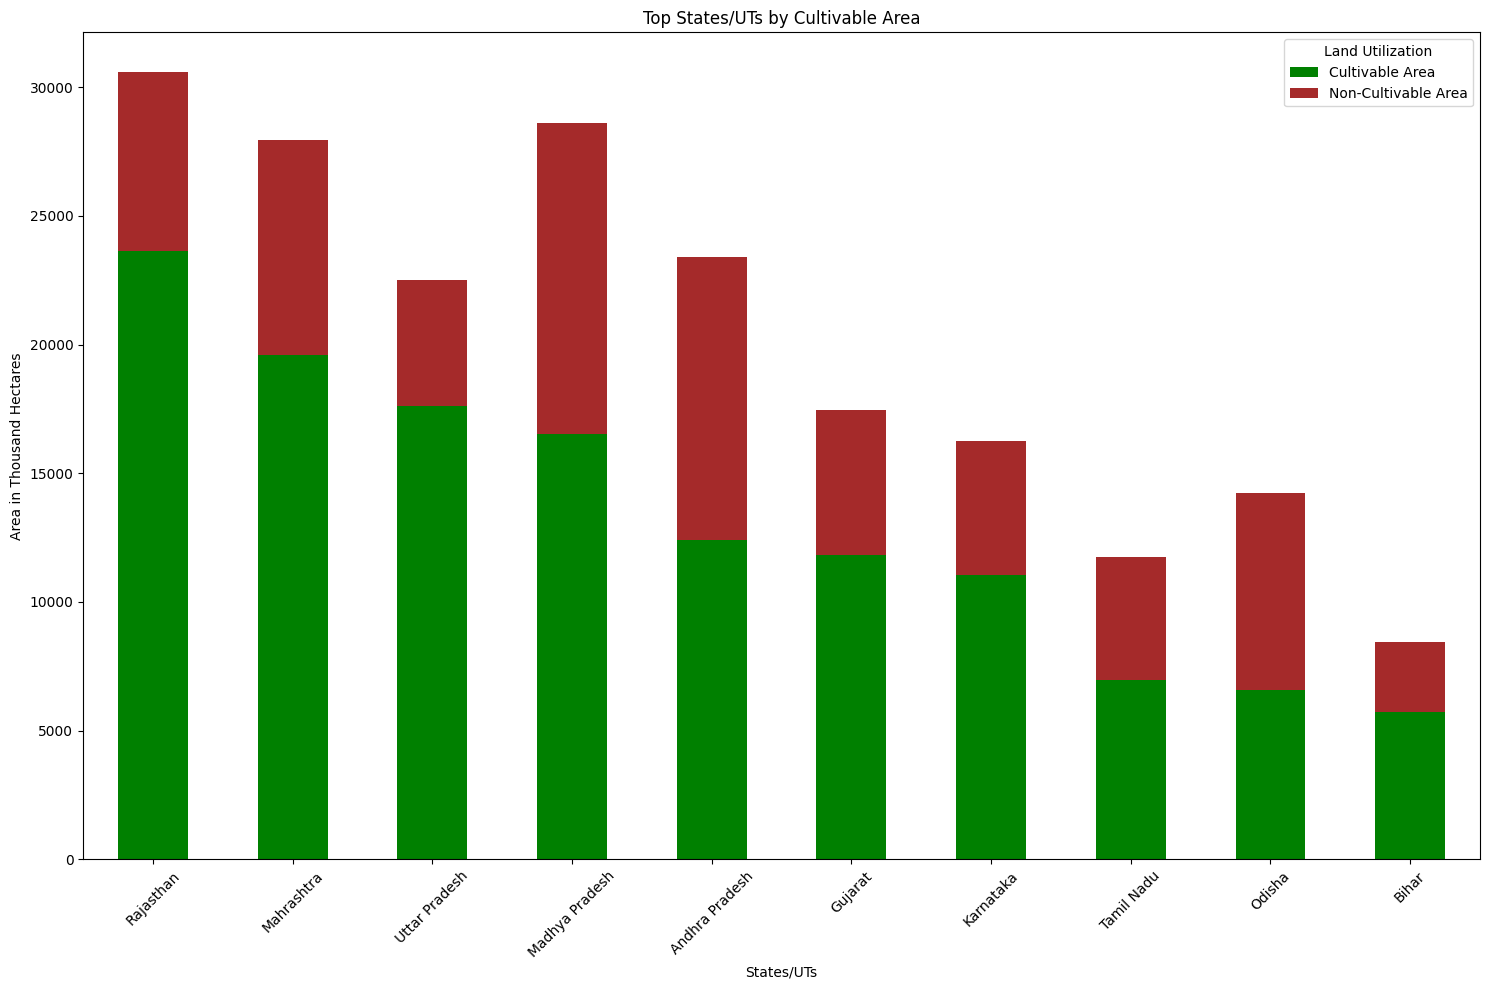

In [ ]:
# Calculate the total cultivable area
data['Cultivable Area'] = data['Net area sown'] + data['Culturable wasteland'] + data['Fallow lands other than current fallows']

# Calculate the non-cultivable area
data['Non-Cultivable Area'] = data['Forests'] + data['Not available for cultivation']

# Sort states/UTs based on cultivable area
sorted_data = data.sort_values(by='Cultivable Area', ascending=False)

# Plot top states/UTs with the highest cultivable area
top_states = sorted_data[['States/UTs', 'Cultivable Area', 'Non-Cultivable Area']].head(10)

# Plot the results
top_states.plot(x='States/UTs', kind='bar', stacked=True, figsize=(15, 10), color=['green', 'brown'])
plt.title('Top States/UTs by Cultivable Area')
plt.xlabel('States/UTs')
plt.ylabel('Area in Thousand Hectares')
plt.legend(title='Land Utilization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
from google.colab import files
upload=files.upload()

Saving Poplation_India(in).csv to Poplation_India(in) (1).csv


In [13]:
import pandas as pd

# Try different encodings like 'ISO-8859-1' or 'latin1'
df = pd.read_csv(r"Poplation_India(in).csv", encoding='ISO-8859-1')
print(df.to_string())


   Population                                  State_UT Population_2023 Rural_Population Rural_Percentage Urban_Population Urban_Percentage Density Sex_Ratio
0      1 (S1)                             Uttar Pradesh    23,56,87,000     15,53,17,278           77.73%      4,44,95,063           22.27%     828       912
1      2 (S2)                               Maharashtra    12,63,85,000      6,15,56,074           54.78%      5,08,18,259           45.22%     365       929
2      3 (S3)                                     Bihar    12,67,56,000      9,23,41,436           88.71%      1,17,58,016           11.29%   1,102       918
3      4 (S4)                               West Bengal     9,90,84,000      6,21,83,113           68.13%      2,90,93,002           31.87%   1,029       953
4      5 (S5)                            Madhya Pradesh     8,65,79,000      5,25,57,404           72.37%      2,00,69,405           27.63%     236       931
5      6 (S6)                                Tamil N

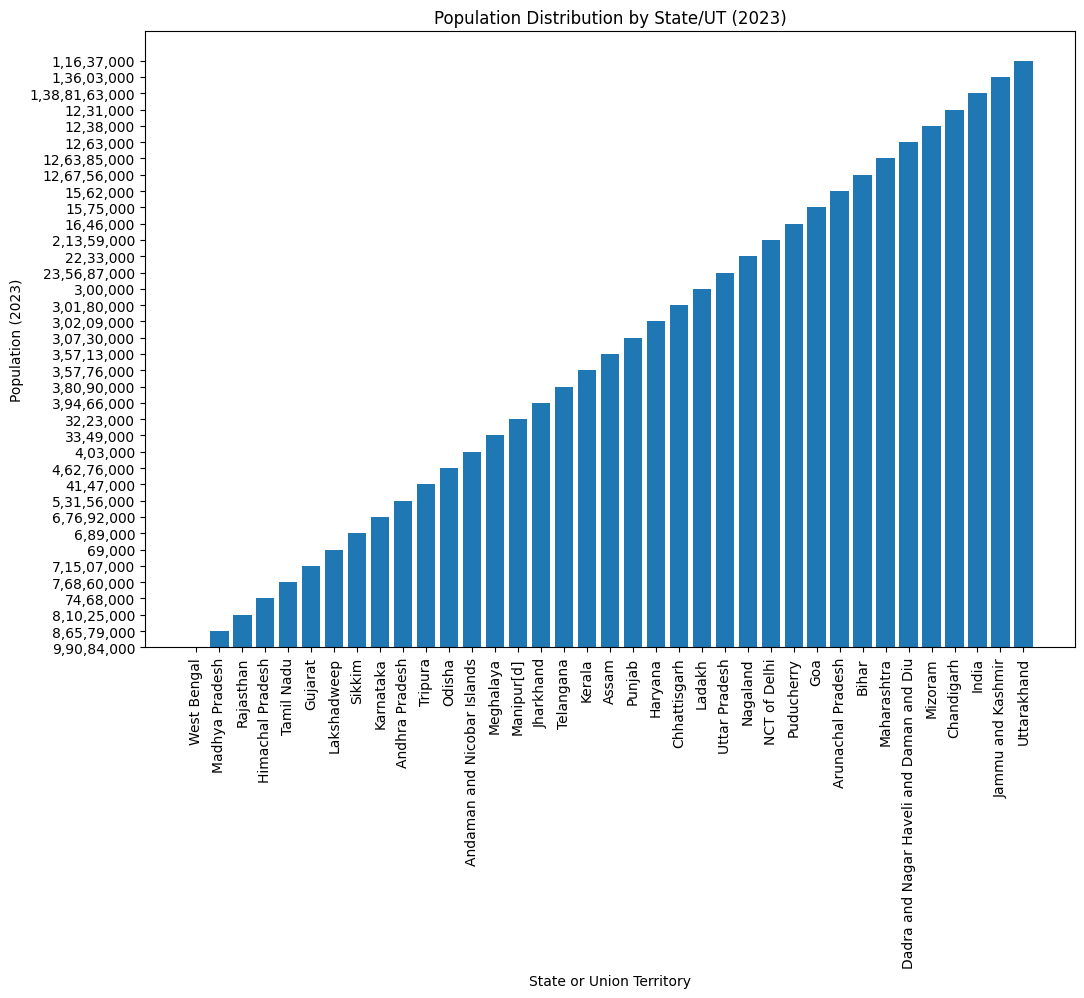

In [ ]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Population_2023', ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(df_sorted['State_UT'], df_sorted['Population_2023'])
plt.xticks(rotation=90)
plt.xlabel('State or Union Territory')
plt.ylabel('Population (2023)')
plt.title('Population Distribution by State/UT (2023)')
plt.show()


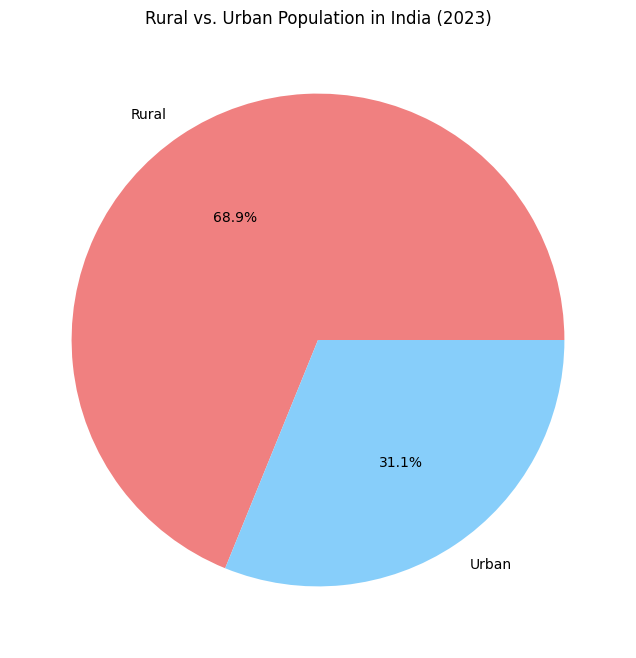

In [ ]:
# Convert columns with commas to integers
df['Rural_Population'] = df['Rural_Population'].replace({',': ''}, regex=True).astype(int)
df['Urban_Population'] = df['Urban_Population'].replace({',': ''}, regex=True).astype(int)

# Recalculate total rural and urban populations
total_rural = df['Rural_Population'].sum()
total_urban = df['Urban_Population'].sum()

# Create pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie([total_rural, total_urban], labels=['Rural', 'Urban'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Rural vs. Urban Population in India (2023)')
plt.show()


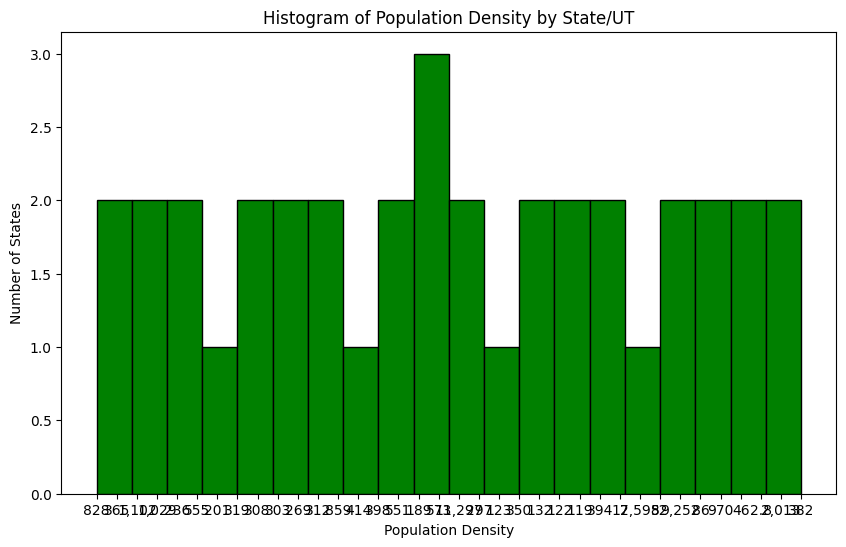

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Density'], bins=20, color='green', edgecolor='black')
plt.xlabel('Population Density')
plt.ylabel('Number of States')
plt.title('Histogram of Population Density by State/UT')
plt.show()


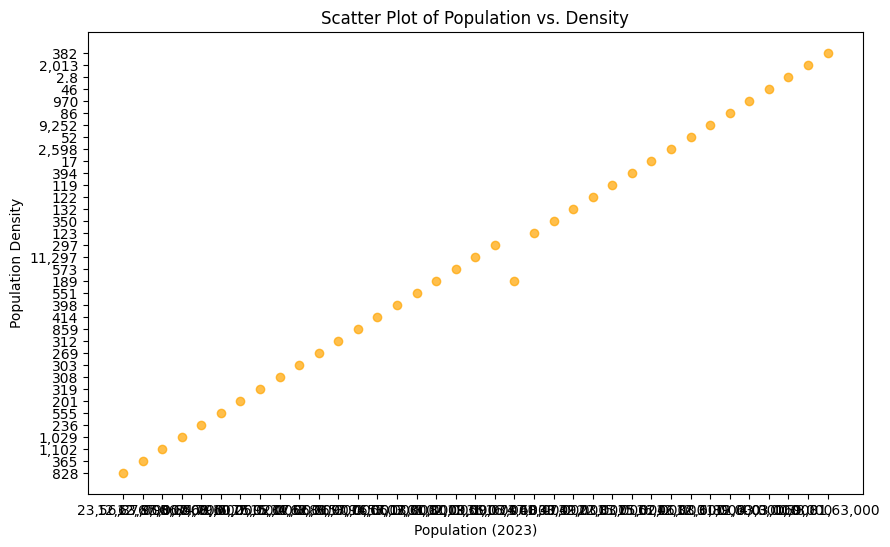

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Population_2023'], df['Density'], alpha=0.7, color='orange')
plt.xlabel('Population (2023)')
plt.ylabel('Population Density')
plt.title('Scatter Plot of Population vs. Density')
plt.show()


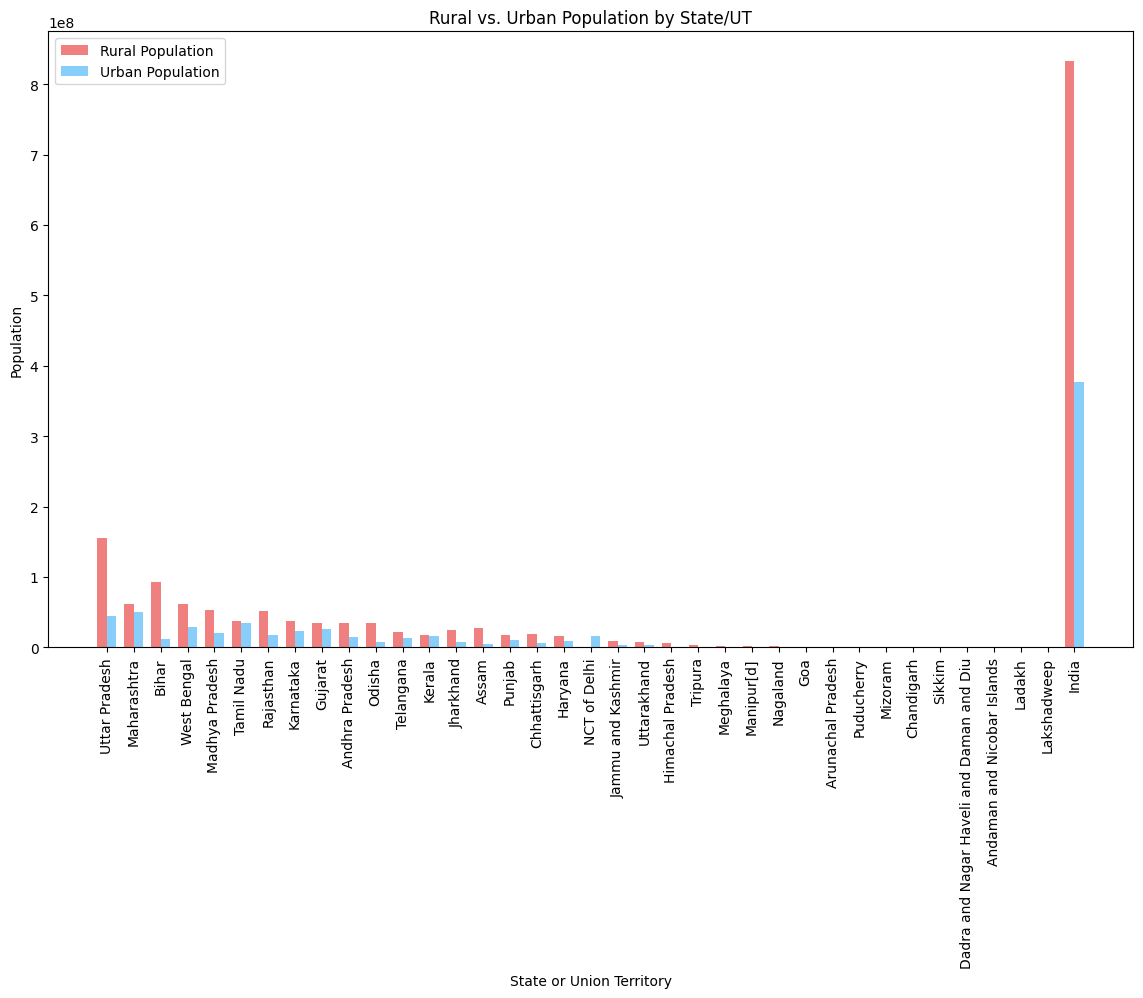

In [ ]:
import numpy as np

x = np.arange(len(df['State_UT']))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width/2, df['Rural_Population'], width, label='Rural Population', color='lightcoral')
bar2 = ax.bar(x + width/2, df['Urban_Population'], width, label='Urban Population', color='lightskyblue')

ax.set_xlabel('State or Union Territory')
ax.set_ylabel('Population')
ax.set_title('Rural vs. Urban Population by State/UT')
ax.set_xticks(x)
ax.set_xticklabels(df['State_UT'], rotation=90)
ax.legend()

plt.show()


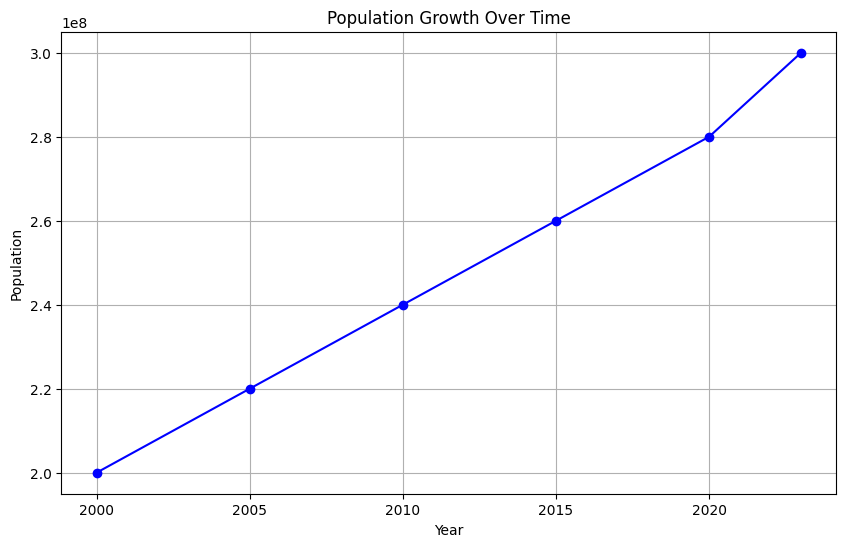

In [ ]:
# Example with hypothetical data
years = [2000, 2005, 2010, 2015, 2020, 2023]
population = [200000000, 220000000, 240000000, 260000000, 280000000, 300000000]

plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.grid(True)
plt.show()
